# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [6]:
import cv2
import numpy as np
from PIL import Image

img = cv2.imread('data/lena.png')

## 模糊

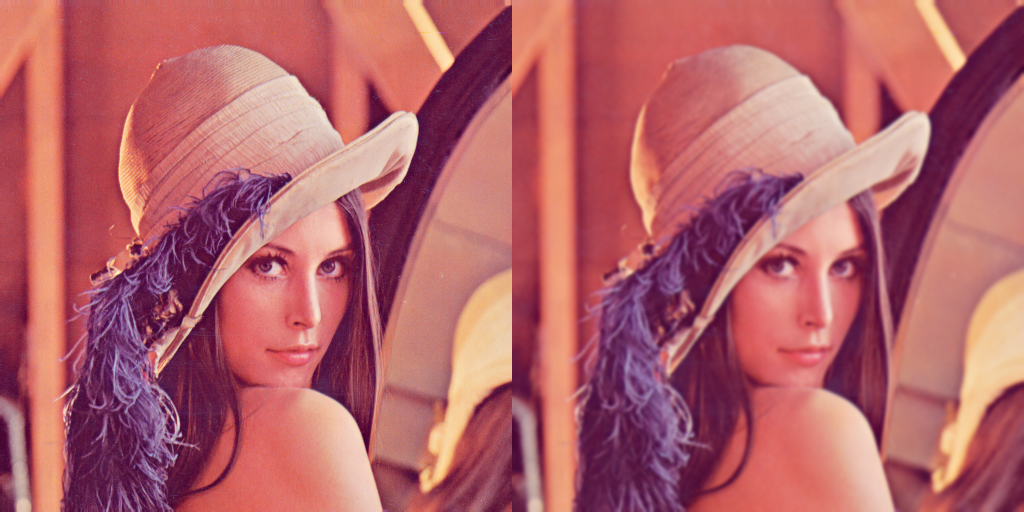

In [7]:
img_blur = img.copy()
img_blur = cv2.GaussianBlur(img_blur, (7, 7), 0)
img_gaussian_stack = np.hstack((img,img_blur))
Image.fromarray(img_gaussian_stack[:,:,::-1])

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

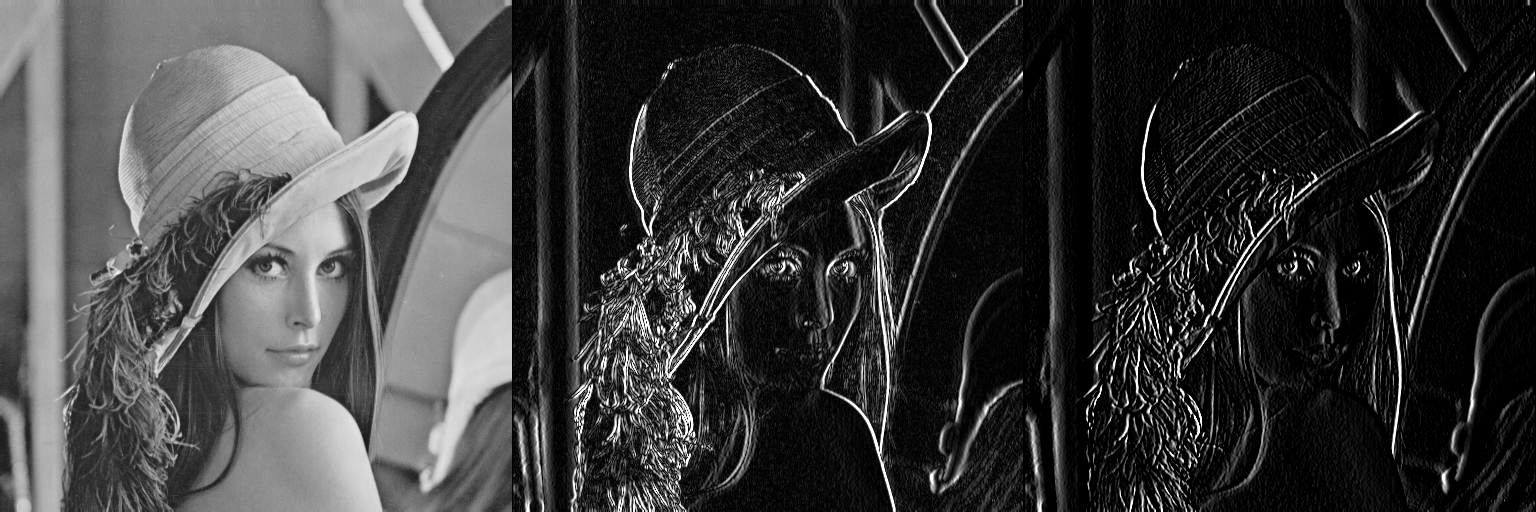

In [8]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測 ddepth = -1/ cv2.CV_8U
img_sobel_x_uint8 = cv2.Sobel(img_grey, -1, dx=1, dy=0, ksize=3)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
# while True:
#     # 比較 Sobel 邊緣檢測的過程中針對負數操作的不同產生的差異
#     cv2.imshow('Edge Detection', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

Image.fromarray(img_show)

### 比較一次與兩次計算偏微分的結果

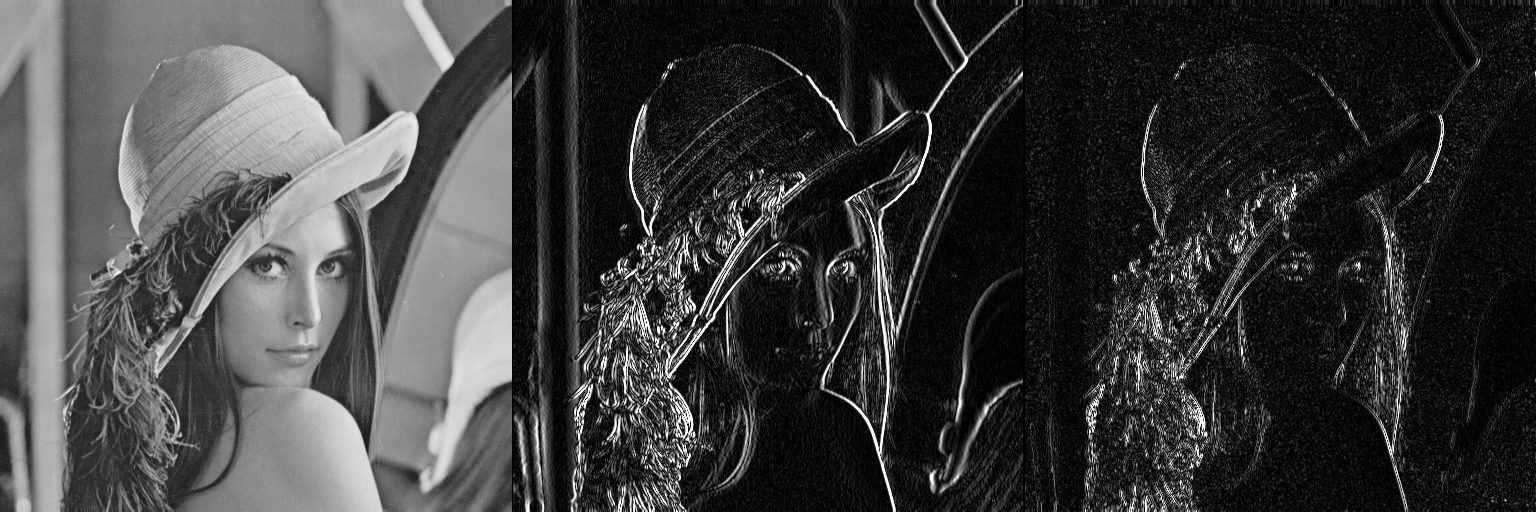

In [17]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_grey,cv2.CV_16S,dx=2,dy=0,ksize=3)
img_sobel_xx = cv2.convertScaleAbs(img_sobel_xx)
#　組合 + 顯示圖片
img_show2 = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
# while True:
#     cv2.imshow('Edge Detection', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

Image.fromarray(img_show2)

###  組合x-axis, y-axis 的影像合成

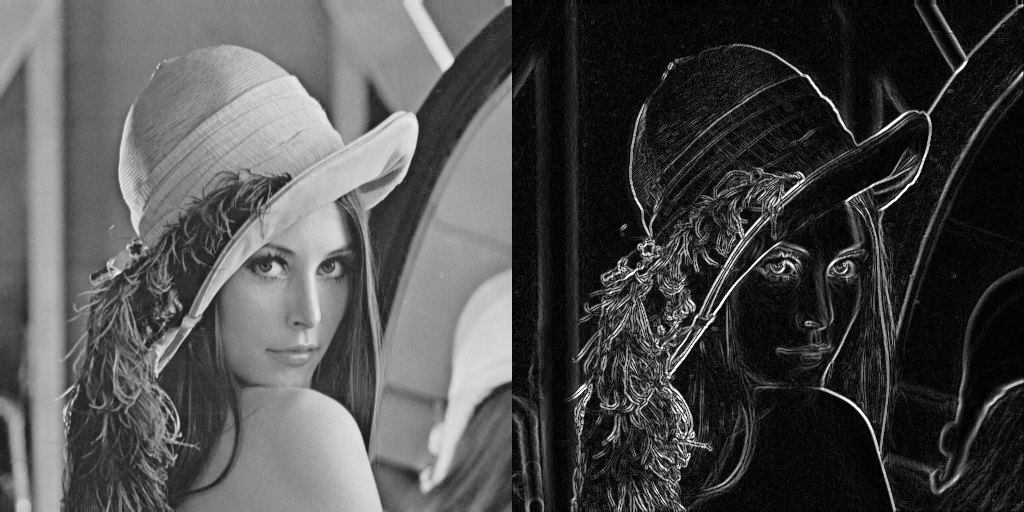

In [19]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# x-axis
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
#y-axis
img_sobel_y = cv2.Sobel(img_grey, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

#combine with weight 0.5, 0.5
img_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

img_show = np.hstack((img_grey, img_combine))

Image.fromarray(img_show)
